# Анализ гипотез для интернет магазина
Нам требуется понять, что приведет крупный интернет-магазин к увеличению выручки. Делать это мы будем на основе гипотез, которые уже были подготовлены. От нас требуется:
- Приоритизировать гипотезы
- Запустить A/B-тест
- Проанализировать результаты.

Наш анализ разделим на 2 этапа (далее перечисляются требования исследованию)

*Часть 1. Приоритизация гипотез.*

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

*Часть 2. Анализ A/B-теста*

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.    Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
 -  Остановить тест, зафиксировать победу одной из групп.
 -  Остановить тест, зафиксировать отсутствие различий между группами.
 -  Продолжить тест.


## Часть 1
### Подготовка данных

Для начала просмотрим файлы, которые нам предоставили, т.к может понадобиться предобработка. Дополнительно еще импортируем библиотеки

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [2]:
# для orders

orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nДата min {}, Дата max {}\n'.format(orders['date'].min(), orders['date'].max()))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
orders.head(5)


Дата min 2019-08-01, Дата max 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [3]:
# для visitors 

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nДата min {}, Дата max {}\n'.format(visitors['date'].min(), visitors['date'].max()))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()
visitors.head(5)


Дата min 2019-08-01, Дата max 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
# для hypothesis

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)
pd.set_option('max_colwidth', 200)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<b>Вывод</b>

для orders:
- сменили тип столбца
- сменили формат даты
- посмотрели какие максимальные и минимальные даты есть
- увидели, что нет пропусков в данных

аналогично для visitors и пока только посмотрели файл hypothesis

### Приоритизация гипотез
#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Приступим к расчетам ICE и отсортируем по убыванию значения

In [5]:
hypothesis['ice'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis.sort_values(by='ice', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Мы видим, что самой приоритетной является гипотеза Запустить акцию, дающую скидку на товар в день рождения

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Посмотрим, что будет, если применить RICE

In [6]:
hypothesis['rice'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis.sort_values(by='rice', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Тут мы уже видим другой результат - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" становится приоритетной 

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

Мы получили протеворечивый результат для ICE и RICE. Это можно объяснить тем, что в ICE не учитывается Reach, который достаточно сильно влияет на результаты. Reach отвечает за кол-во уникальных пользователей или проще говоря охват. 

Выберем "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" как приоритетную. Можно еще рассмотреть "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"


## Часть 2
###  Анализ A/B-теста
#### Проверка качества данных.
Перед работой проверим некоторые моменты, которые могут сыграть роль в дальнейших результатах.

In [7]:
# для orders

display(orders.duplicated().sum())
display(orders.isna().sum())
orders.info()

0

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
# для orders 
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [9]:
# для visitors 

display(visitors.duplicated().sum())
display(visitors.isna().sum())
visitors.info()

0

date        0
group       0
visitors    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Мы получили общую информацию, теперь посмотрим есть ли пересекающиеся данные

In [11]:
(orders.groupby(['visitorId'])['group'].nunique().reset_index().query('group > 1').count())

visitorId    58
group        58
dtype: int64

Да, таких оказалось не очень много, но от них стоит избавиться, т.к они будут влиять на дальнейши выводы

In [12]:
# отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# пользователи в двух группах 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))

In [13]:
orders_without_intersections = orders.query('visitorId not in @group_intersections')

In [14]:
orders = orders.query('visitorId not in @group_intersections')

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


 <b>Вывод</b>
 
 Для orders и visitors нет дубликатов и пустых значений. Но нам попались пересекающиеся данные, которые мы убрали из выборки 
 

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [16]:
#уникальные значения для дат и групп
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

#кумулятивные показатели orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'],
                                                                     x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
#кумулятивные показатели visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'],
                                                                         x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)
#добавляем в одну таблицу
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Вывели таблицу, теперь построим график

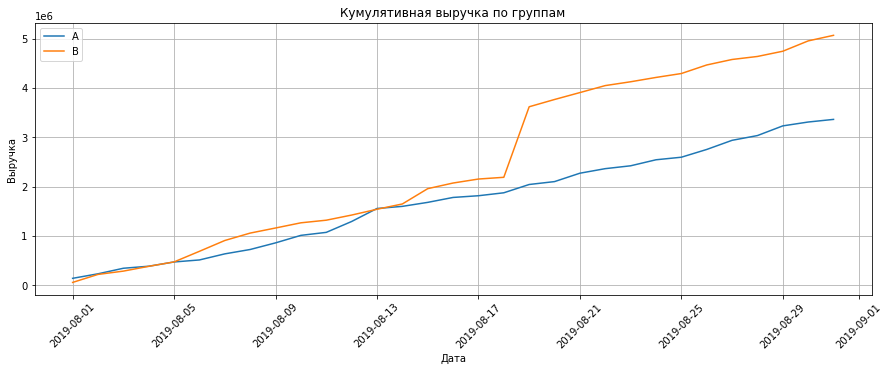

In [17]:
#построение графика

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

До середины месяца графики групп А и В местами близки, иногда В выбивается, однако, после 17 числа есть резкий всплеск в этой группе. Можно проверить медианой

In [18]:
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(10)

Медианное значение одного заказа 19 августа = 2578.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B
531,4016435970,4017075195,2019-08-19,13390,A
318,3412626998,3282099314,2019-08-19,11985,A


Один заказ явно выбивается - 425, будем иметь это ввиду

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

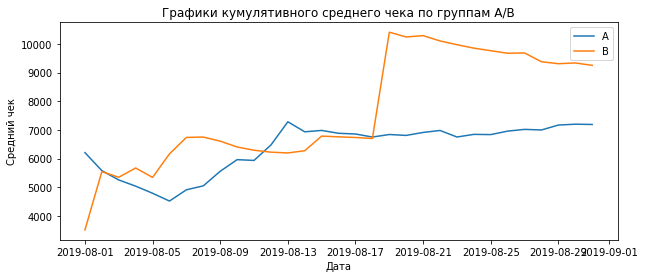

In [19]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Мы видим, что средний чек рос довольно плавно для обеих групп, но аномаьное значение в группе В дало резкий всплеск

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

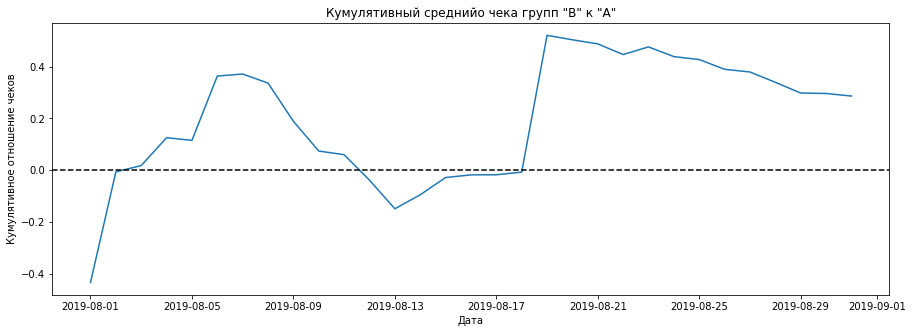

In [20]:
# мерджим данные
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим график
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Кумулятивный среднийо чека групп "B" к "А"')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel("Кумулятивное отношение чеков")
plt.show()

В начале теста лучше себя чувствовали показатели группы B, затем они стали ухудшаться относительно А. Аналогично прошлым графикам мы видим всплеск в группе В

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

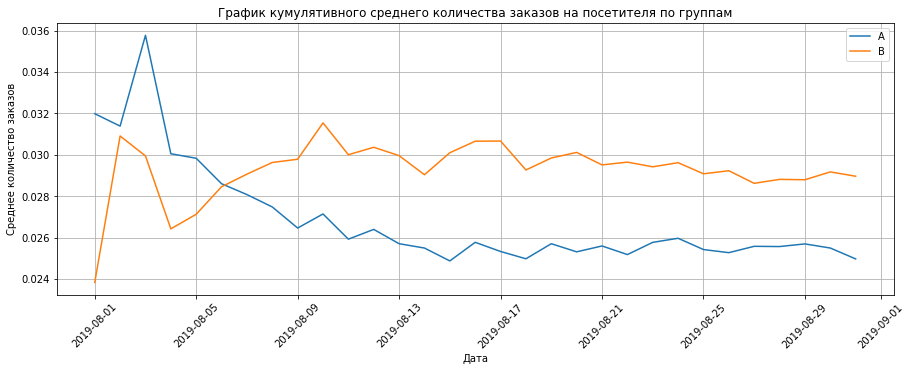

In [21]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Среднее количество заказов группы А довольно хорошо показывала себя, но далее все пошло на спад. Для группы В, наоборо, после 5 числа мы видим стабильно высокие показатели

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

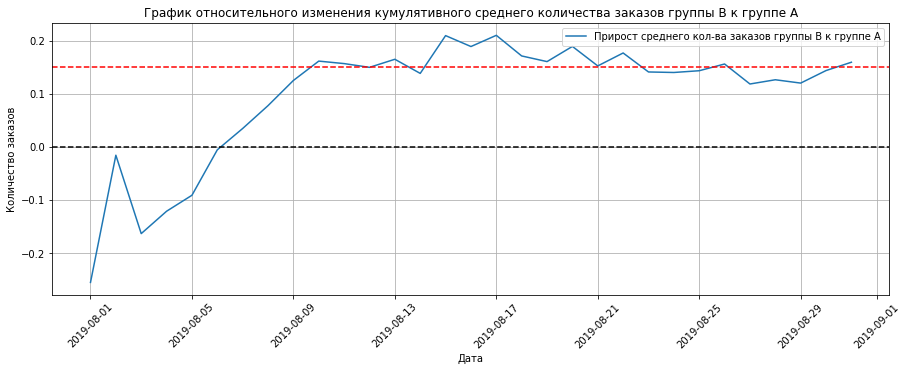

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(15,5))
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, label="Прирост среднего кол-ва заказов группы B к группе A")

plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Группа В имеет хороший прирост - примерно в 15 - 20% 

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [23]:
#таблица заказов
orders_by_users = orders.groupby(
    'visitorId', as_index=False).agg({'transactionId':'nunique'}).rename(columns={'transactionId':'orders'}
)
orders_by_users.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


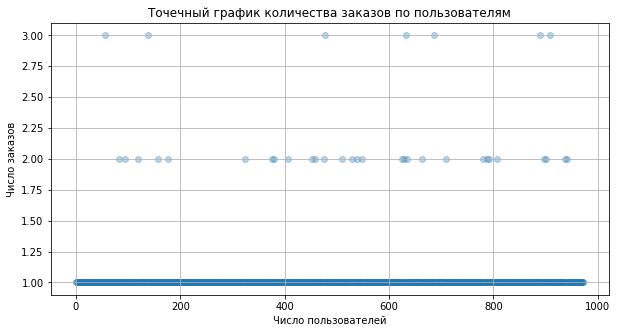

In [24]:
#построение графика
x_values = pd.Series(range(0,len(orders_by_users['orders'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.3)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов')
plt.grid()
plt.show()

Основное количество покупок - 1, однако есть и совершенные 2 раза, 3 раза - уже единичные случаи

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Посмотрим на перцентили, что бы понять какие считать за аномалии

In [25]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


In [26]:
print('перцентили c 95 по 99 (по заказам) : ', np.percentile(orders_by_users['orders'], [95,96,97,98, 99])) 

перцентили c 95 по 99 (по заказам) :  [1. 1. 2. 2. 2.]


Обычно 1-2 заказа - это частые продажи, а вот 3 составляют ~1%, их мы и будем считать за аномалии

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

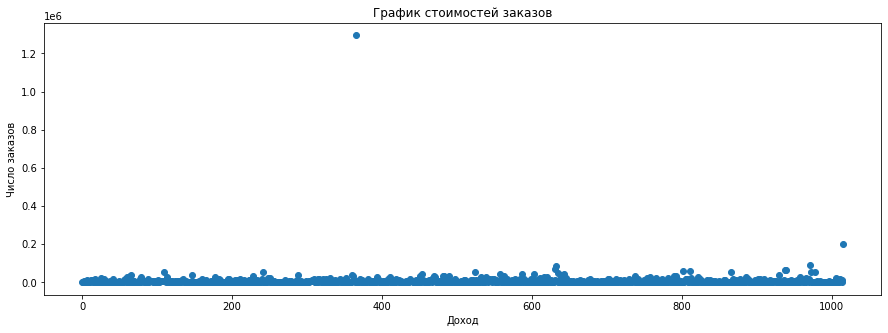

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
plt.xlabel("Доход")
plt.ylabel("Число заказов")
plt.scatter(x_values, orders['revenue'])
plt.show()

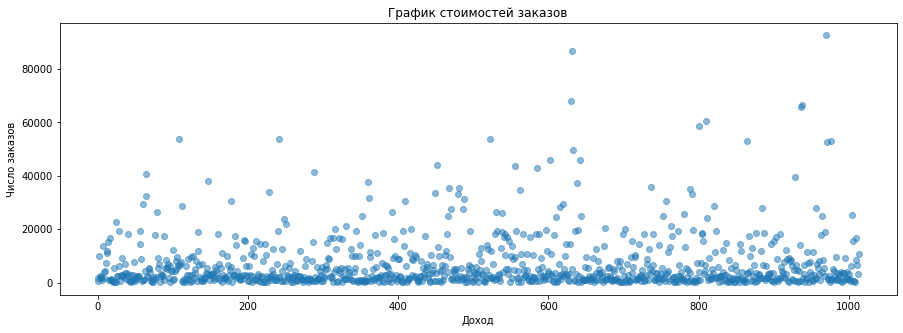

In [28]:
#увеличим результат для наглядности
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
plt.xlabel("Доход")
plt.ylabel("Число заказов")
plt.scatter(xn_values, norm_orders, alpha=0.5)
plt.show()

До 20000 - это приблизительно те пределы, в которых большая часть заказов. Посмотрим еще и на процентили

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей совершили заказ на сумму больше 26785.
Не более 1% пользователей совершили заказ на сумму больше 53904. Аномальными будут заказы на сумму больше 53904.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [30]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACumulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACumulative.columns = ['date', 'visitorsCumulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCumulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCumulative.columns = ['date', 'visitorsCumulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACumulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACumulative.columns = ['date', 'ordersCumulativeA', 'revenueCumulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCumulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCumulative.columns = ['date', 'ordersCumulativeB', 'revenueCumulativeB']

In [31]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCumulativeA,revenueCumulativeA,ordersCumulativeB,revenueCumulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCumulativeA,visitorsCumulativeB
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
26,2019-08-27,23,185350,11,111347,419,2940471,473,4579312,711,720,16376,16523
23,2019-08-24,13,122013,14,87866,372,2546023,428,4215269,395,378,14322,14448


Сформулируем гипотезы:

Нулевая гипотеза: Статистически значимых различий  в среднем количестве заказов между группами по «сырым» данным нет.

Альтернативная гипотеза: Статистически значимых различий  в среднем количестве заказов между группами по «сырым» данным есть.

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

Манна-Уитни используем, т.к есть выбросы, а сам тест работает с рангами, не учитывая сами значения.

In [32]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].
                                                  sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].
                                                  sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160


P-value оказался меньше 0.05, поэтому мы не можем подтвердить нулевую гипотезу. 

 Количество заказов в группе A не равно группе B (между выборками имеется статистическая значимость). Относительный прирост среднего группы В к группе А равен 16%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: Статистически значимых различий  в среднем чеке заказа между группами по «сырым» данным нет.

Альтернативная гипотеза: Статистически значимых различий  в среднем чеке заказа между группами по «сырым» данным есть.

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

In [33]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                    orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель "B" и "A" = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].
                                                            mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
Относительный показатель "B" и "A" = 0.287


P-value оказалось больше 0.05, что не дает отвергнуть нулевую гипотезу. 
Средний чек в группе A равен группе B (статистическая значимость не значительна и сделать вывод о различии нельзя).
Относительный прирост среднего чека группы В к группе А равен 28,7%. Что было заметно на графиках ранее.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

Нулевая гипотеза: Статистически значимых различий  в среднем количестве заказов на посетителя между группами по  «очищенным» данным нет.

Альтернативная гипотеза: Статистически значимых различий  в среднем количестве заказов на посетителя между группами по  «очищенным» данным есть.

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

Мы увидели некоторые аномалии в прошлых исследованиях. Сейчас попробуем от них избавиться

In [34]:
usersWithManyOrders = pd.concat(
    [
         ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId'],
    ],
    axis=0,
)
revenue_lim = np.percentile(orders['revenue'], 99)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


Избавились от аномалий, теперь посчитаем статистическую значимость различий между группами теста по очищенным данным. 

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#статистический критерий Манна-Уитни
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель "B" и "A" = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Относительный показатель "B" и "A" = 0.189


Мы видим, что p-value = 0.007 еще 0.05. Нулевую гипотезу отвергаем. 
Теперь видно, что по очищенным данным есть различия групп A и B. При этом группа В выбивается по результатам на ~18%

#### Примите решение по результатам теста и объясните его.

Сформулируем гипотезы:

Нулевая гипотеза: Статистически значимых различий  в среднем чеке заказа между группами по «очищенным» данным нет.

Альтернативная гипотеза: Статистически значимых различий  в среднем чеке заказа между группами по  «очищенным» данным есть.

Применим критерием Манна-Уитни. Порогом статистической значимости установим alpha = 0.05

In [36]:
print(
    'p-value ={0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный показатель "B" и "A" = {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value =0.788
Относительный показатель "B" и "A" = -0.032


Нет причин отвергать нулевую гипотезу. Считать, что в среднем чеке есть различия, аналогично не можем. Средний чек группы B незначительно ниже,чем в группе A

## Вывод

Из того анализа, который мы провели, можно сказать, что тест успешно пройден и его можно остановить.

По сырым и очищенным данным  в среднем количестве заказов на посетителя группы А != В (имеется статистическая значимость).
Если говорить о среднем чеке, то А = В, тут уже статистическая значимость незначительна и нельзя точно сказать о различи (касается и очищенных и сырых данных)

Как итог, можно сказать, то группа В имеет лучше данные  в среднем количестве заказов на посетителя, но почти не имеет различия по среднему чеку с группой А